# Supplementary Figure 6. Explore CCC results using LIANA and their consensus score

We wanted to confirm our observations of the lack of correlation between CCC and colocalization by using another method to calculate CCC. In this case we selected LIANA, as it runs the main methodologies for CCC prediction and then, computes a consensus score. 

In [75]:
global_path = './cell-cell-communication/' ## Path to the github downloaded repository

In [76]:
import scanpy as sc
import liana as li

import pandas as pd
import numpy as np 
from collections import Counter
from scipy.spatial import distance


import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

import sys
sys.path.insert(1, global_path + 'Functions/')
from downstream_analysis import select_regional_spots, compute_colocalization, plot_CCCvsColoc, run_LIANA



title_size = 12
labelout_size = 10
label_size = 8
ticks_size = 6



# CID4465

In [100]:
# Run LIANA
patient = 'CID4465'
counts_file_path = global_path + 'Data/Breast/Input_CP/'+patient+'_adata_cancer_region_ass.h5ad'
meta_file_path = global_path + 'Data/Breast/Input_CP/'+patient+'_metadata_cancer_region_ass.tsv'
list_loc = ['#B16BA8', '#F39426']
l = run_LIANA(counts_file_path, list_loc, 'celltype_loc')


Using `.X`!
12986 features of mat are empty, they will be removed.
The following cell identities were excluded: Cancer Cycling, Cycling PVL, Luminal Progenitors
Using resource `consensus`.
0.32 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 1504 samples and 16747 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████| 100/100 [00:00<00:00, 154.80it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|██████████| 100/100 [00:02<00:00, 39.07it/s]
/aloy/home/epareja/2022/single_cell/paper_folders/Functions/downstream_analysis.py:478: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [101]:
cytospace_folder = global_path + 'Results/Breast/CytoSPACE/'+patient+'/'
spots_loc1, spots_loc2 = select_regional_spots(cytospace_folder, counts_file_path, list_loc)
closest_cells_df = compute_colocalization(cytospace_folder, 'Cancer', spots_loc1, spots_loc2)

In [102]:
subset = ['Endothelial RGS5', 'Endothelial Lymphatic LYVE1',  'B cells Memory',  'Plasmablasts', 'T cells CD4+', 'Mature Luminal', 'Luminal Progenitors', 'Endothelial CXCL12']
set(subset).difference(set(l.cell))

{'B cells Memory', 'Luminal Progenitors', 'Plasmablasts'}

In [103]:
## To add cells for which no interactions have been found but they were present in the calculation
new_row = {'cell': 'B cells Memory', 'counts_x': 0, 'counts_y': 0}
new_row2 = {'cell': 'Plasmablasts', 'counts_x': 0, 'counts_y': 0}

df = pd.DataFrame([new_row, new_row2])
l = pd.concat([l,df])

/aloy/home/epareja/2022/single_cell/paper_folders/Functions/downstream_analysis.py:332: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


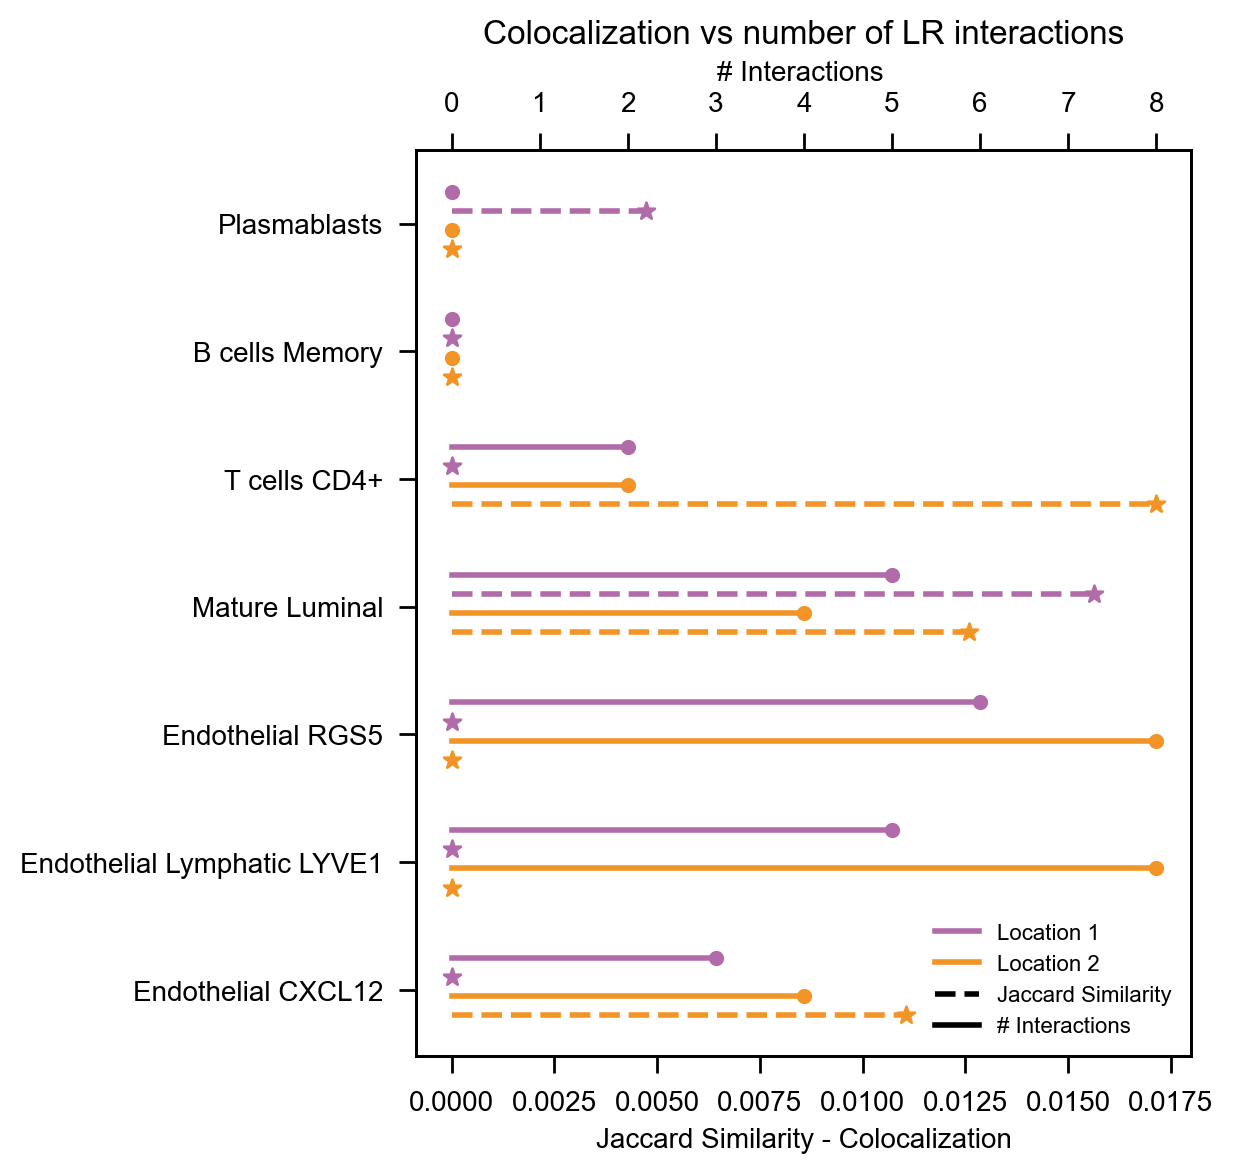

In [105]:
data_cc_coloc_CID4465 = plot_CCCvsColoc(closest_cells_df, l, subset)


# CID4290

In [106]:
# Run LIANA
patient = 'CID4290'
counts_file_path = global_path + 'Data/Breast/Input_CP/'+patient+'_adata_cancer_region_ass.h5ad'
meta_file_path = global_path + 'Data/Breast/Input_CP/'+patient+'_metadata_cancer_region_ass.tsv'
list_loc = ['#B16BA8', '#F39426']
l = run_LIANA(counts_file_path, list_loc, 'celltype_loc')


Using `.X`!
7482 features of mat are empty, they will be removed.
The following cell identities were excluded: Cycling PVL
Using resource `consensus`.
0.18 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 5592 samples and 22251 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████| 100/100 [00:01<00:00, 99.96it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|██████████| 100/100 [00:10<00:00,  9.73it/s]
/aloy/home/epareja/2022/single_cell/paper_folders/Functions/downstream_analysis.py:478: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [107]:
cytospace_folder = global_path + 'Results/Breast/CytoSPACE/'+patient+'/'
spots_loc1, spots_loc2 = select_regional_spots(cytospace_folder, counts_file_path, list_loc)
closest_cells_df = compute_colocalization(cytospace_folder, 'Cancer', spots_loc1, spots_loc2)

In [108]:
subset = ['Endothelial RGS5', 'Endothelial CXCL12',  'NK cells',  'B cells Memory', 'T cells CD4+', 'CAFs MSC iCAF-like', 'Luminal Progenitors', 'Cycling PVL']
set(subset).difference(set(l.cell))

{'Cycling PVL'}

/aloy/home/epareja/2022/single_cell/paper_folders/Functions/downstream_analysis.py:332: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


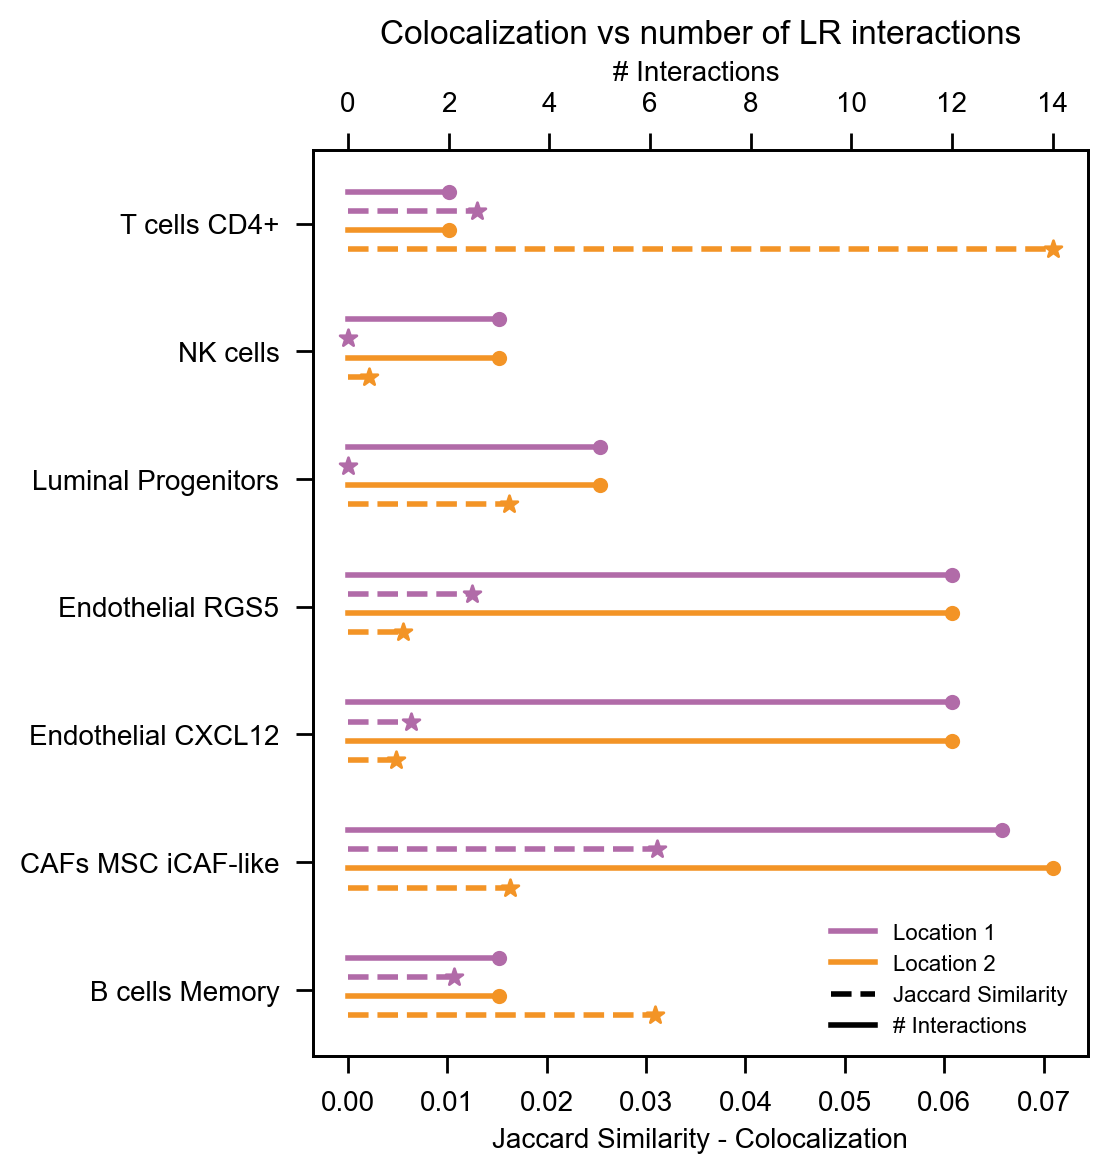

In [109]:
data_cc_coloc_CID4290 = plot_CCCvsColoc(closest_cells_df, l, subset)


# CID4535

In [110]:
# Run LIANA
patient = 'CID4535'
counts_file_path = global_path + 'Data/Breast/Input_CP/'+patient+'_adata_cancer_region_ass.h5ad'
meta_file_path = global_path + 'Data/Breast/Input_CP/'+patient+'_metadata_cancer_region_ass.tsv'
list_loc = ['#B16BA8', '#F39426']
l = run_LIANA(counts_file_path, list_loc, 'celltype_loc')


Using `.X`!
8399 features of mat are empty, they will be removed.
The following cell identities were excluded: Myoepithelial
Using resource `consensus`.
0.21 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 2699 samples and 21334 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████| 100/100 [00:01<00:00, 97.15it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|██████████| 100/100 [00:06<00:00, 15.65it/s]
/aloy/home/epareja/2022/single_cell/paper_folders/Functions/downstream_analysis.py:478: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [111]:
cytospace_folder = global_path + 'Results/Breast/CytoSPACE/'+patient+'/'
spots_loc1, spots_loc2 = select_regional_spots(cytospace_folder, counts_file_path, list_loc)
closest_cells_df = compute_colocalization(cytospace_folder, 'Cancer', spots_loc1, spots_loc2)

In [112]:
subset = ['Endothelial ACKR1', 'Macrophage',  'B cells Memory',  'Plasmablasts', 'Mature Luminal', 'T cells CD4+', 'Endothelial RGS5', 'Cycling PVL']
set(subset).difference(set(l.cell))

{'T cells CD4+'}

In [113]:
## To add cells for which no interactions have been found but they were present in the calculation
new_row = {'cell': 'T cells CD4+', 'counts_x': 0, 'counts_y': 0}
df = pd.DataFrame([new_row])
l = pd.concat([l,df])

/aloy/home/epareja/2022/single_cell/paper_folders/Functions/downstream_analysis.py:332: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


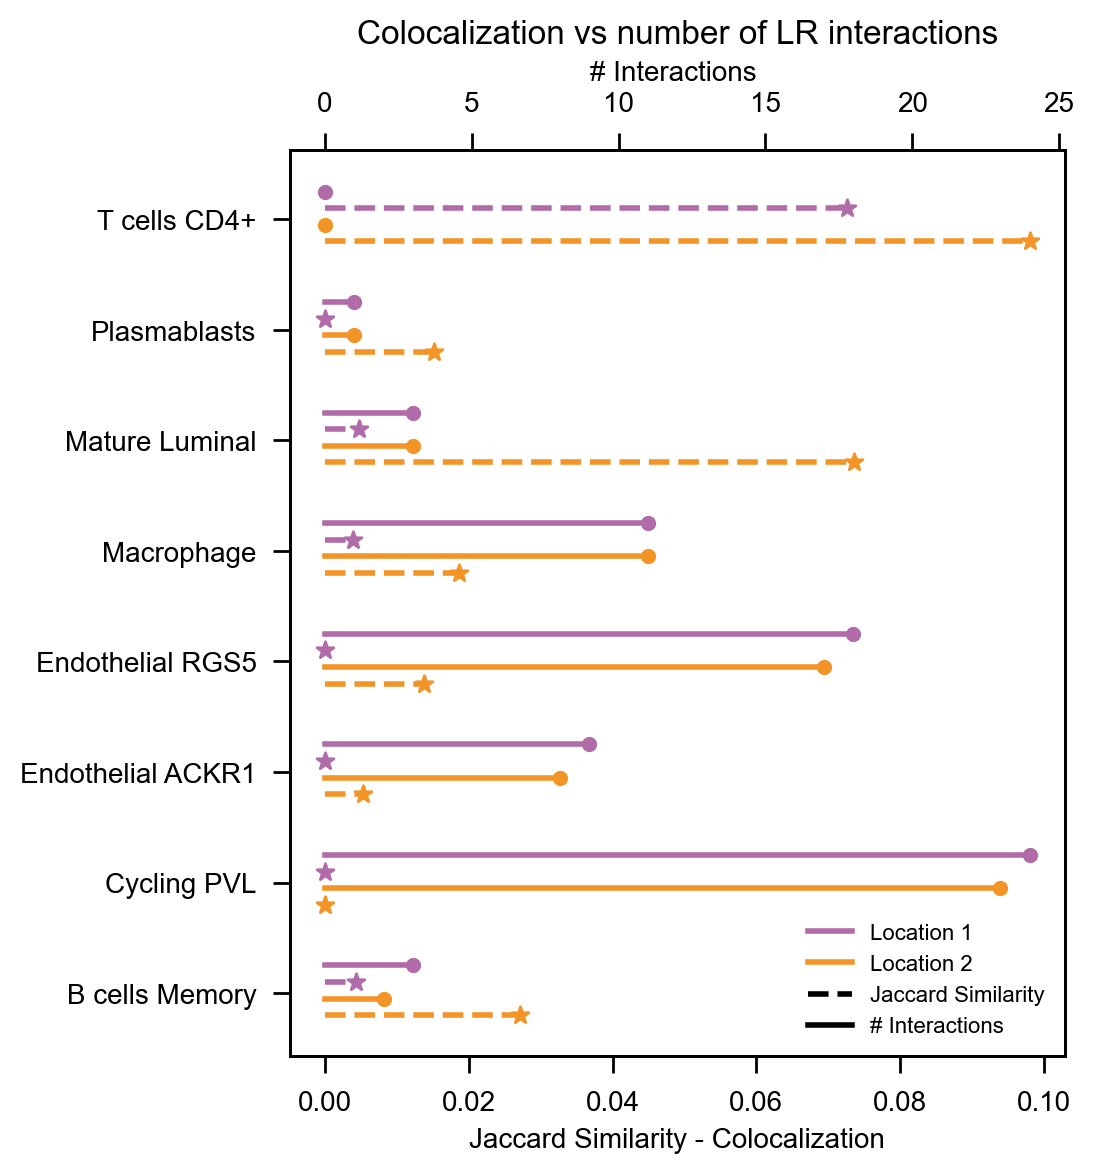

In [114]:
data_cc_coloc_CID4535 = plot_CCCvsColoc(closest_cells_df, l, subset)


# CID44971

In [115]:
# Run LIANA
patient = 'CID44971'
counts_file_path = global_path + 'Data/Breast/Input_CP/'+patient+'_adata_cancer_region_ass.h5ad'
meta_file_path = global_path + 'Data/Breast/Input_CP/'+patient+'_metadata_cancer_region_ass.tsv'
list_loc = ['#B16BA8', '#F39426']
l = run_LIANA(counts_file_path, list_loc, 'celltype_loc')


Using `.X`!
6460 features of mat are empty, they will be removed.
The following cell identities were excluded: B cells Naive
Using resource `consensus`.
0.13 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 3626 samples and 23273 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████| 100/100 [00:01<00:00, 82.94it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|██████████| 100/100 [00:08<00:00, 11.20it/s]
/aloy/home/epareja/2022/single_cell/paper_folders/Functions/downstream_analysis.py:478: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [116]:
cytospace_folder = global_path + 'Results/Breast/CytoSPACE/'+patient+'/'
spots_loc1, spots_loc2 = select_regional_spots(cytospace_folder, counts_file_path, list_loc)
closest_cells_df = compute_colocalization(cytospace_folder, 'Cancer', spots_loc1, spots_loc2)

In [117]:
subset = ['CAFs myCAF-like', 'Myoepithelial',  'B cells Naive',  'Plasmablasts','Macrophage', 'Luminal Progenitors', 'Endothelial RGS5', 'NKT cells']
set(subset).difference(set(l.cell))

{'B cells Naive'}

/aloy/home/epareja/2022/single_cell/paper_folders/Functions/downstream_analysis.py:332: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


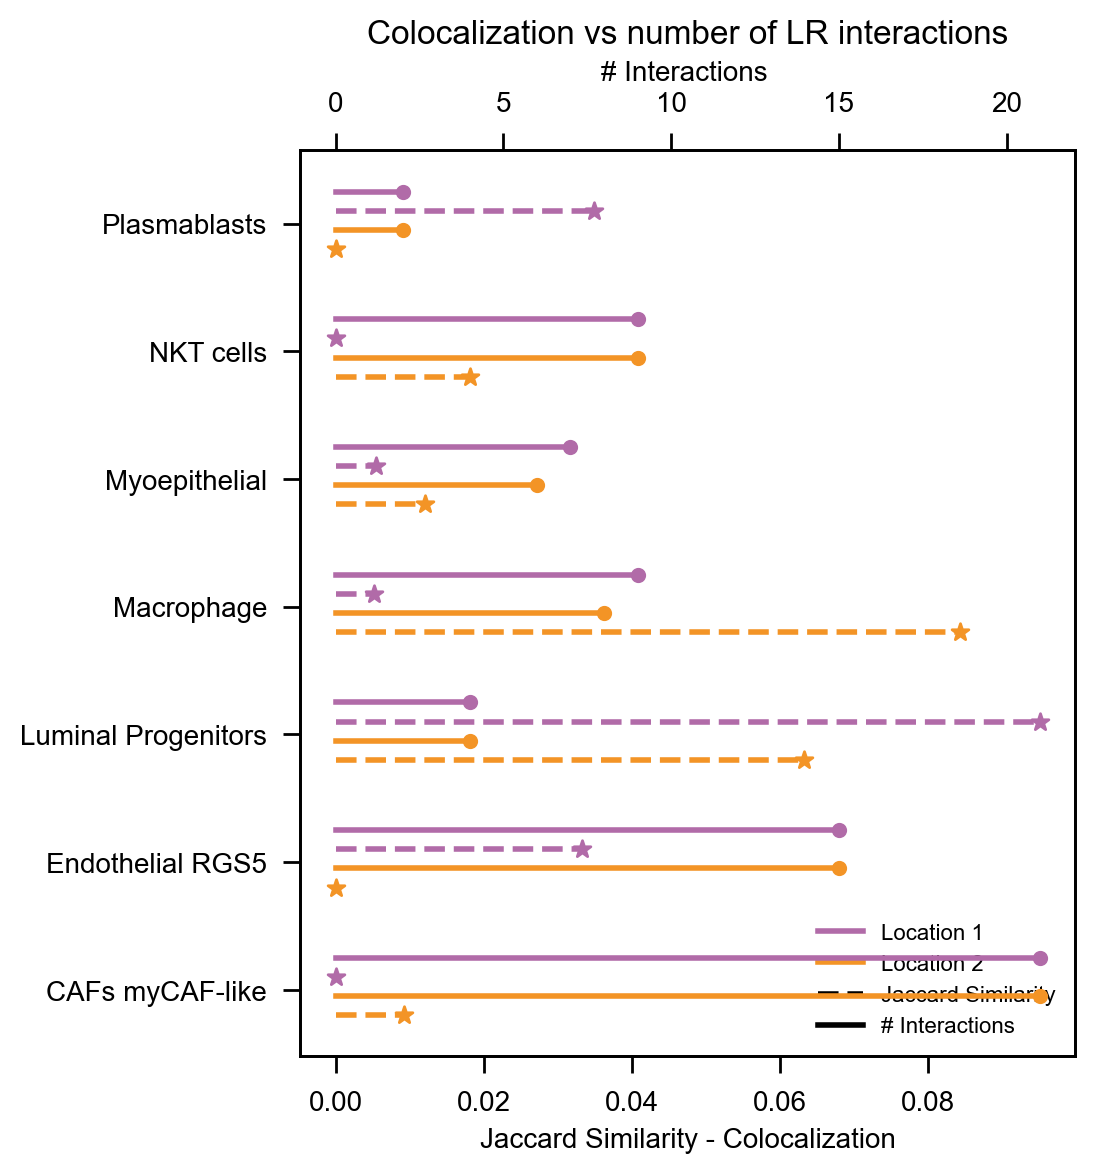

In [118]:
data_cc_coloc_CID44971 = plot_CCCvsColoc(closest_cells_df, l, subset)


# GRID

In [119]:


def fig_CCvscoloc (ax, data, title = 'Colocalization vs number of LR interactions', loc_legend = 'lower right'):
# Plot the jaccard similarities as horizontal lolliplots
    for i, row in data.iterrows():

        ax.plot([0, row['JS_loc2']], [i, i], color='#F39426', lw=2, ls = '--', zorder=10)
        ax.scatter([row['JS_loc2']], [i], color='#F39426', s=40, marker='*', zorder=10)

        ax.plot([0, row['JS_loc1']], [i + 0.3, i + 0.3], color='#B16BA8', lw=2, ls = '--', zorder=10)
        ax.scatter([row['JS_loc1']], [i + 0.3], color='#B16BA8', s=40,  marker='*', zorder=10)
        
    # Create a second x-axis to represent the interactions with cancer cells
    ax2 = ax.twiny() 

    # Plot the number of significant LR interctions as horizontal lolliplots
    for i, row in data.iterrows():
        ax2.plot([0, row['Cancer_loc2']], [i + 0.15, i + 0.15], color='#F39426', lw=2, zorder=10)
        ax2.scatter([row['Cancer_loc2']], [i + 0.15], color='#F39426', s=20, zorder=10)

        ax2.plot([0, row['Cancer_loc1']], [i + 0.45, i + 0.45], color='#B16BA8', lw=2, zorder=10)
        ax2.scatter([row['Cancer_loc1']], [i + 0.45], color='#B16BA8', s=20, zorder=10)
        

    ax.set_yticks(np.array((range(len(data['cells'])))) + 0.2, data['cells'], fontsize = labelout_size)


    ax.set_xlabel('Jaccard Similarity - Colocalization',  fontsize=labelout_size)
    ax2.set_xlabel('# Interactions with cancer cells ',  fontsize=labelout_size)

    ax.tick_params(axis='both', labelsize=labelout_size)



    legend_elements = [
        Line2D([0], [0], color='#B16BA8', lw=2, label='Location 1'),
        Line2D([0], [0], color='#F39426', lw=2, label='Location 2'),
        Line2D([0], [0], color='black', lw=2, ls='--', label='Jaccard Similarity'),
        Line2D([0], [0], color='black', lw=2, label='# Interactions')
    ]
    ax.legend(handles=legend_elements, fontsize=label_size, frameon = False, loc = loc_legend)
    ax.set_title(title, fontsize=title_size, y = 1.12)


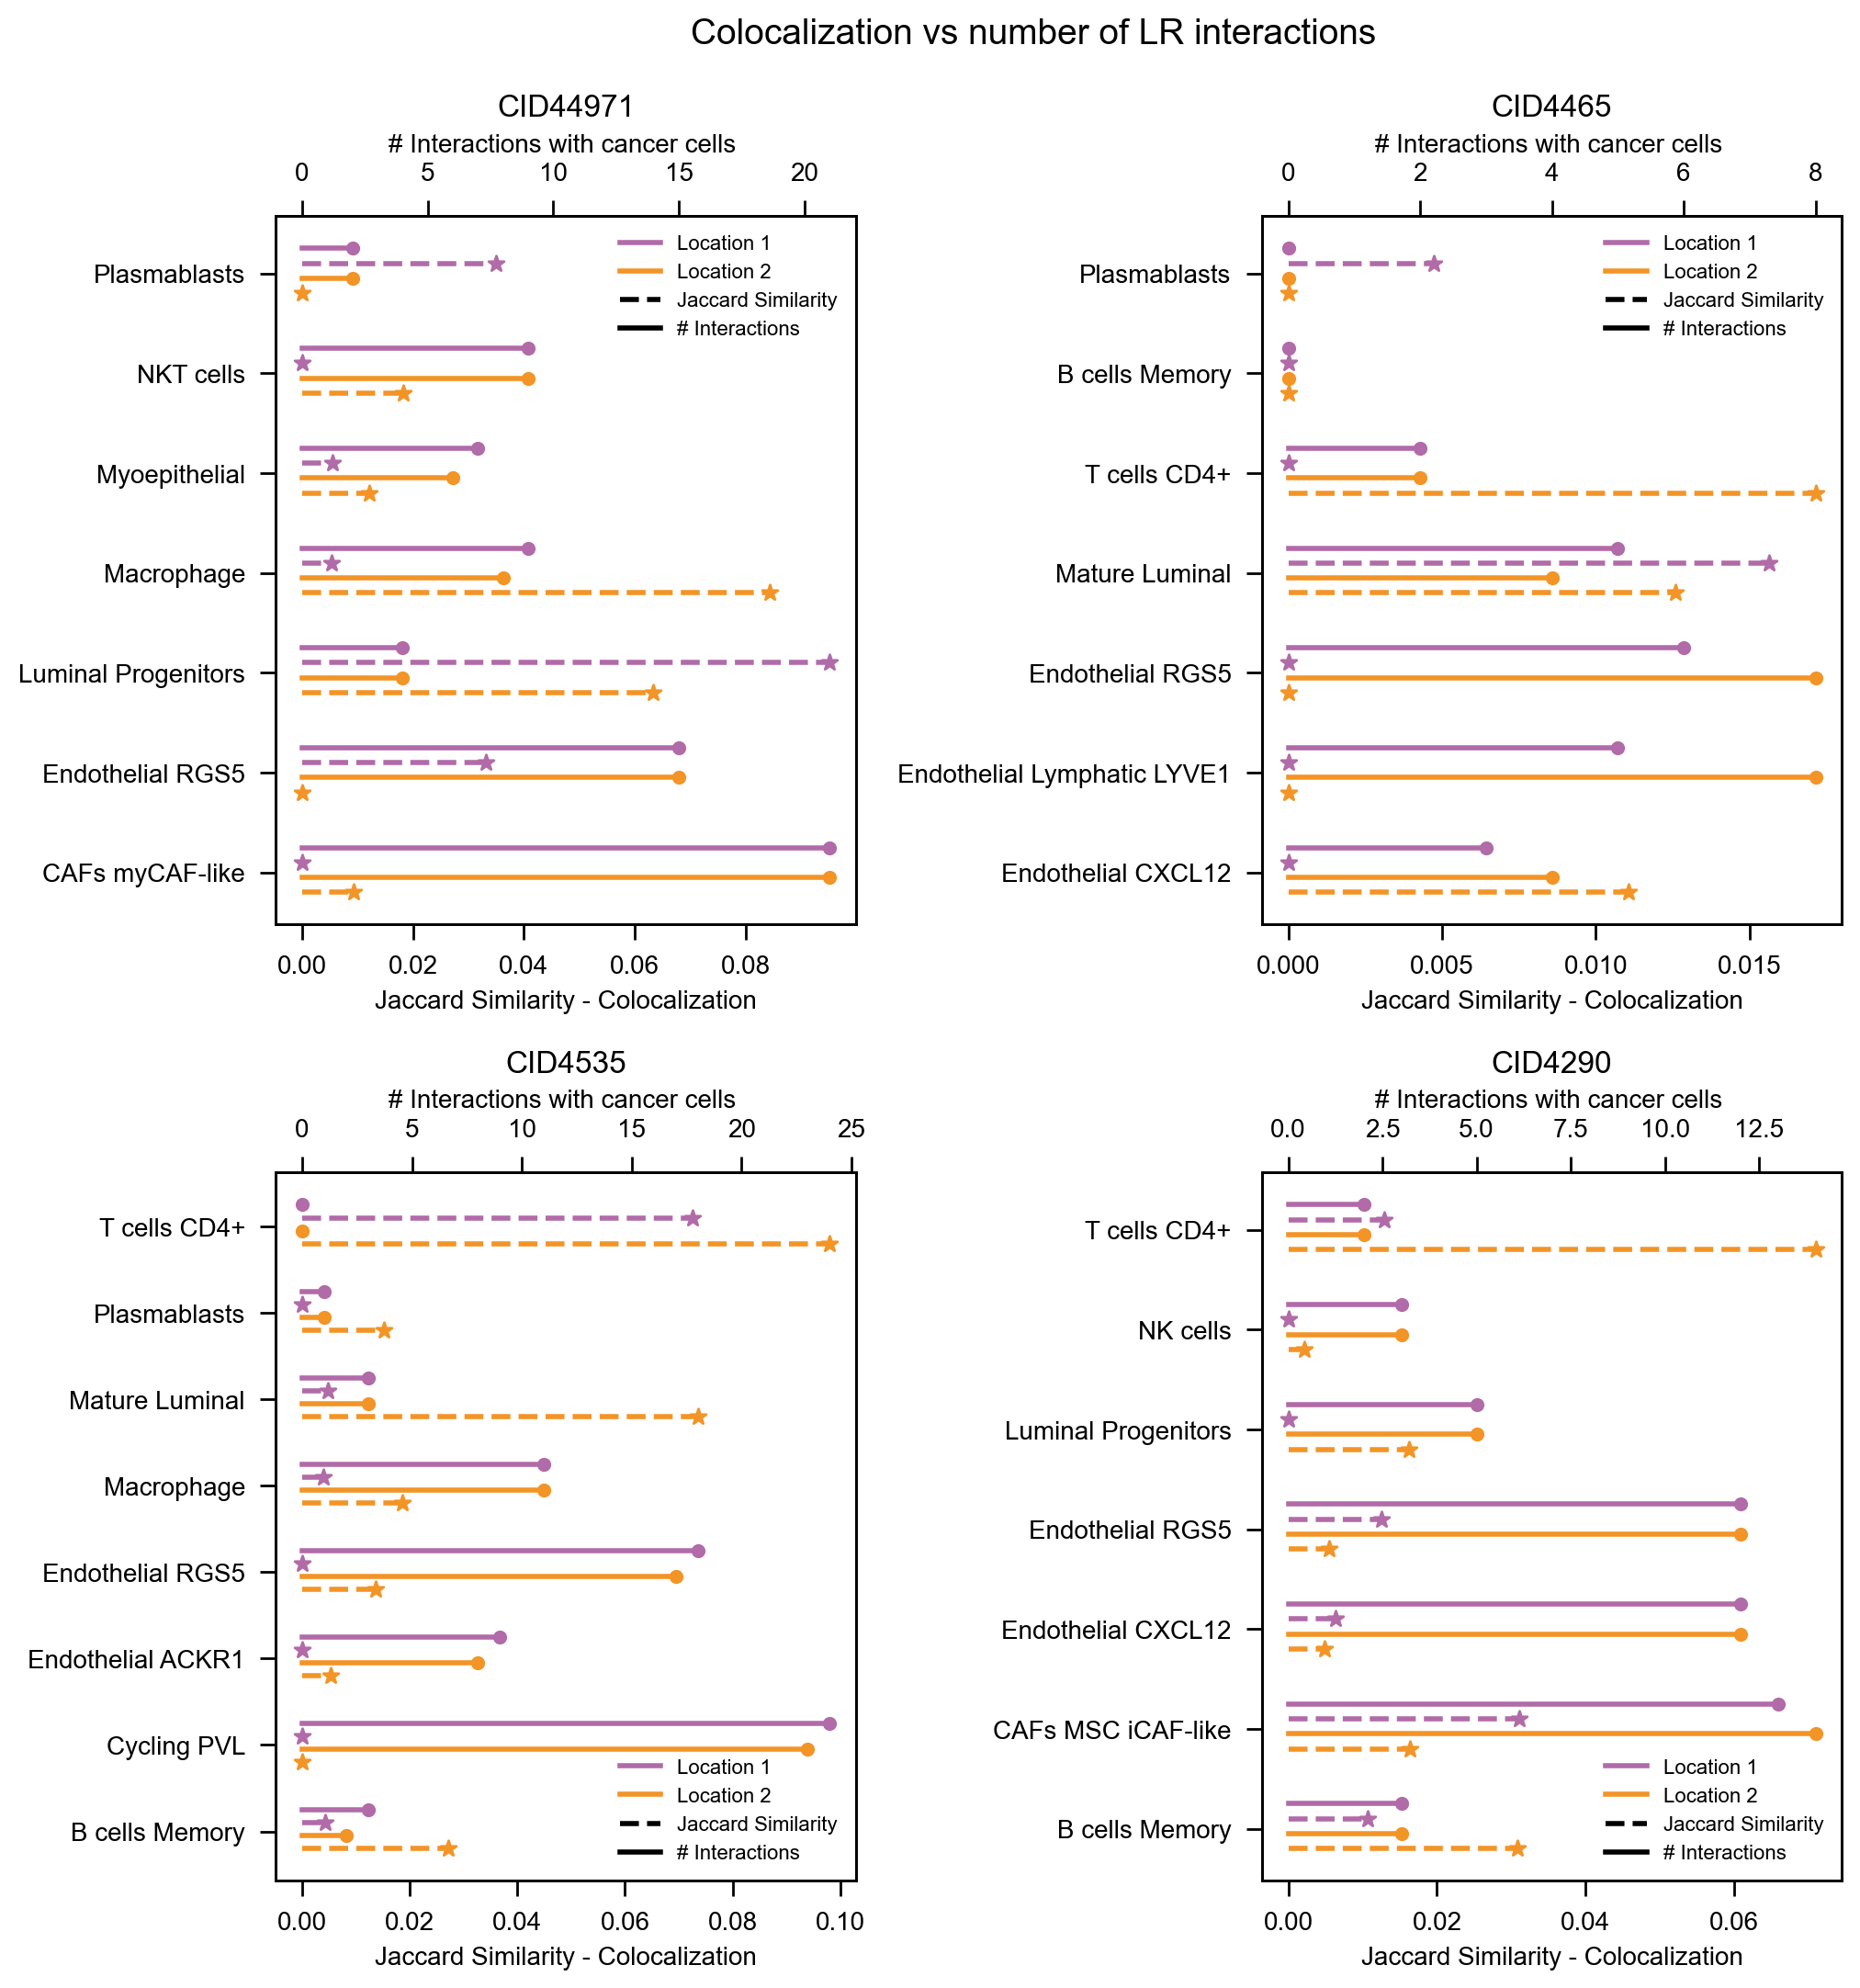

In [120]:
# Create the plot
fig, ax = plt.subplots(2,2, figsize=(11, 12), dpi=200)
plt.subplots_adjust(hspace=0.35, wspace=0.7)
ax = ax.flatten()

fig_CCvscoloc(ax[0], data_cc_coloc_CID44971, title = 'CID44971', loc_legend = 'upper right')
fig_CCvscoloc(ax[1], data_cc_coloc_CID4465, title = 'CID4465', loc_legend = 'upper right')
fig_CCvscoloc(ax[2], data_cc_coloc_CID4535, title = 'CID4535', loc_legend = 'lower right')
fig_CCvscoloc(ax[3], data_cc_coloc_CID4290, title = 'CID4290', loc_legend = 'lower right')
fig.suptitle('Colocalization vs number of LR interactions', fontsize=title_size+2, y = 0.97)


plt.savefig(global_path+'LIANA_Cancer.svg',format='svg', dpi=300 , bbox_inches='tight')
plt.savefig(global_path+'LIANA_Cancer.png',format='png', dpi=300, facecolor='white', edgecolor='none', bbox_inches='tight')